In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

Features

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – candidate don't leave the job , 1 – candidate leave the job

In [2]:
df=pd.read_csv('aug_train.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [6]:
df.drop('company_size',axis=1,inplace=True)
df.company_type.replace(np.nan,'Early Stage Startup',inplace=True)
df.gender.replace(np.nan,'Female',inplace=True)
df.enrolled_university.replace(np.nan,'Part time course',inplace=True) 
df.education_level.replace(np.nan,'Phd',inplace=True)  
df.major_discipline.replace(np.nan,'Business Degree',inplace=True)
df.experience.replace(np.nan,8,inplace=True)
df.experience.replace('>20',20,inplace=True)
df.experience.replace('<1',1,inplace=True)
df['experience']=df['experience'].astype('int64')
df.last_new_job.replace(np.nan,0,inplace=True)
df.last_new_job.replace('never',5,inplace=True)
df.last_new_job.replace('>4',4,inplace=True)
df['last_new_job']=df['last_new_job'].astype('int64')
df['target']=df['target'].astype('int64')

In [7]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Early Stage Startup,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,4,47,0
2,11561,city_21,0.624,Female,No relevent experience,Full time course,Graduate,STEM,5,Early Stage Startup,5,83,0
3,33241,city_115,0.789,Female,No relevent experience,Part time course,Graduate,Business Degree,1,Pvt Ltd,5,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,Funded Startup,4,8,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  int64  
 9   company_type            19158 non-null  object 
 10  last_new_job            19158 non-null  int64  
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.9+ MB


In [9]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [10]:
df.drop('enrollee_id',axis=1,inplace=True)

In [11]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Early Stage Startup,1,36,1
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,4,47,0
2,city_21,0.624,Female,No relevent experience,Full time course,Graduate,STEM,5,Early Stage Startup,5,83,0
3,city_115,0.789,Female,No relevent experience,Part time course,Graduate,Business Degree,1,Pvt Ltd,5,52,1
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,Funded Startup,4,8,0


In [12]:
df.describe()

,city_development_index,experience,last_new_job,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,0.828848,9.948742,2.424470,65.366896,0.249348
std,0.123362,6.455487,1.560464,60.058462,0.432647
min,0.448000,1.000000,0.000000,1.000000,0.000000
25%,0.740000,4.000000,1.000000,23.000000,0.000000
50%,0.903000,9.000000,2.000000,47.000000,0.000000
75%,0.920000,16.000000,4.000000,88.000000,0.000000
max,0.949000,20.000000,5.000000,336.000000,1.000000


Text(0.5, 1.0, 'city_development_index distribution')

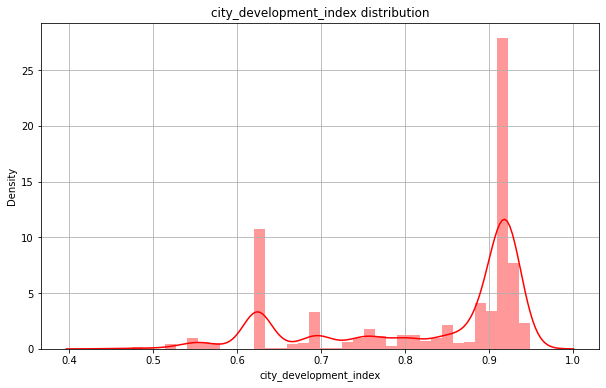

In [13]:
plt.figure(figsize=(10,6))
plt.grid(True)
sns.distplot(df['city_development_index'],color='red')
plt.title('city_development_index distribution')

Male      13221
Female     5746
Other       191
Name: gender, dtype: int64

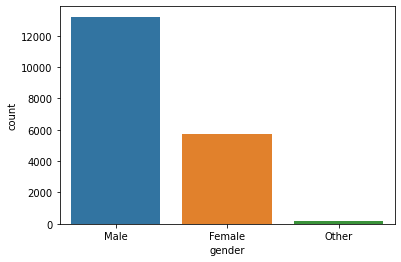

In [14]:
sns.countplot(df['gender'])
df.gender.value_counts()

# The Employees Having Experience or Not ?

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

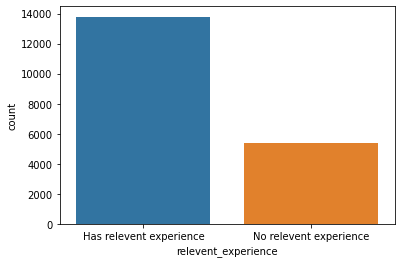

In [15]:
sns.countplot(df['relevent_experience'])
df['relevent_experience'].value_counts()

# The Employees Having total years of Experience ?

<AxesSubplot:xlabel='experience', ylabel='count'>

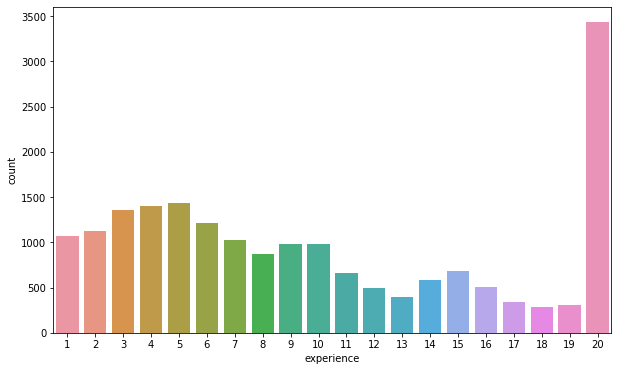

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(df['experience'])

# In which company type the Employees Work more ?

Pvt Ltd                9817
Early Stage Startup    6743
Funded Startup         1001
Public Sector           955
NGO                     521
Other                   121
Name: company_type, dtype: int64

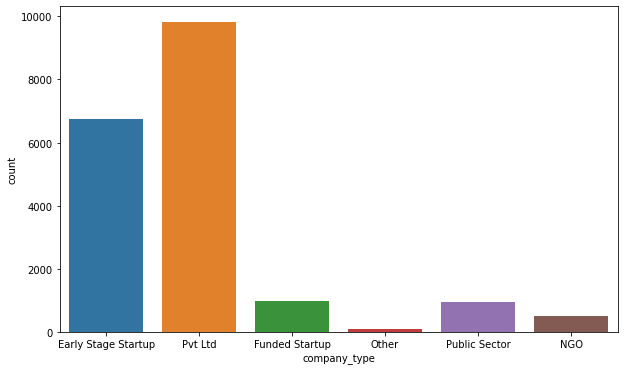

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(df['company_type'])
df['company_type'].value_counts()

# Education Level of Employees

Graduate          11598
Masters            4361
High School        2017
Phd                 874
Primary School      308
Name: education_level, dtype: int64

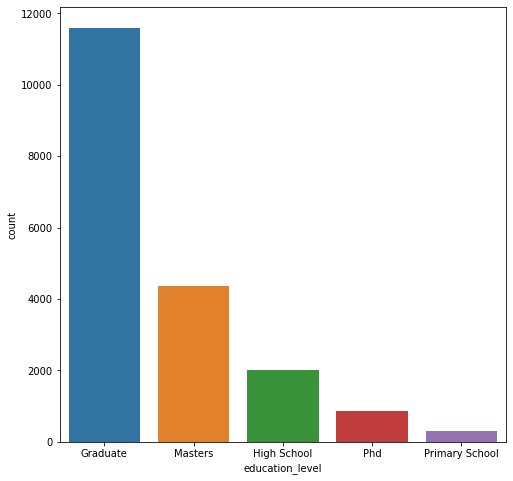

In [18]:
plt.figure(figsize=[8,8])
sns.countplot(df['education_level'])
df['education_level'].value_counts()

# Difference in years between previous job and current job of Employees 

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

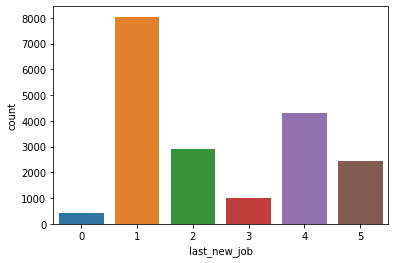

In [19]:
sns.countplot(df['last_new_job'])

# is the Employees enrolled  University courses ?

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

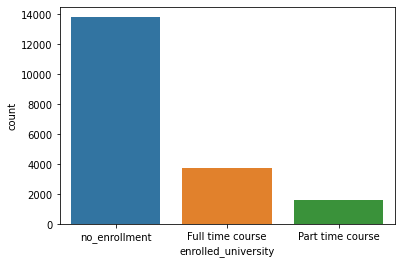

In [20]:
sns.countplot(df['enrolled_university'])

# from which educational background employees are more

STEM               14492
Business Degree     3140
Humanities           669
Other                381
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

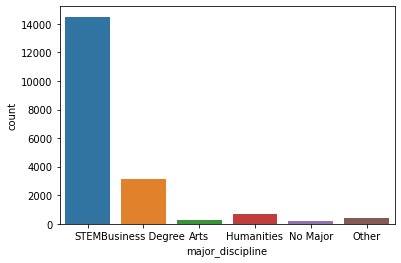

In [21]:
sns.countplot(df['major_discipline'])
df['major_discipline'].value_counts()

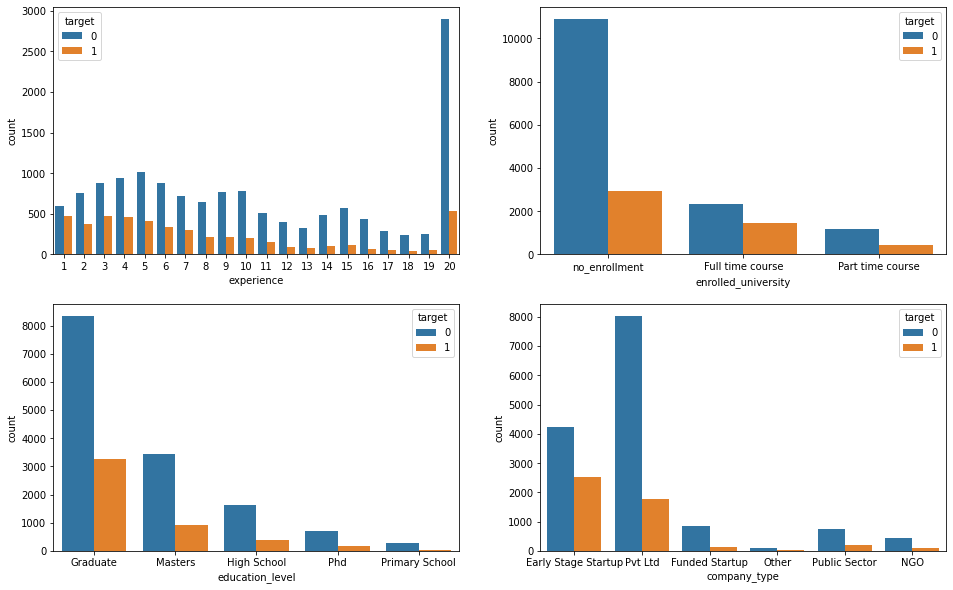

In [22]:
fig,axes=plt.subplots(2,2,figsize=(16,10))
sns.countplot(data=df,x='experience',hue='target',ax=axes[0,0])
sns.countplot(data=df,x='enrolled_university',hue='target',ax=axes[0,1])
sns.countplot(data=df,x='education_level',hue='target',ax=axes[1,0])
sns.countplot(data=df,x='company_type',hue='target',ax=axes[1,1])
plt.show()

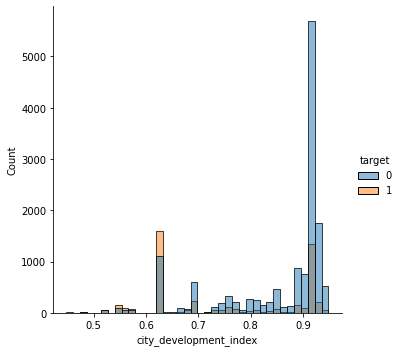

In [23]:
sns.displot(x ='city_development_index',hue='target',data =df)

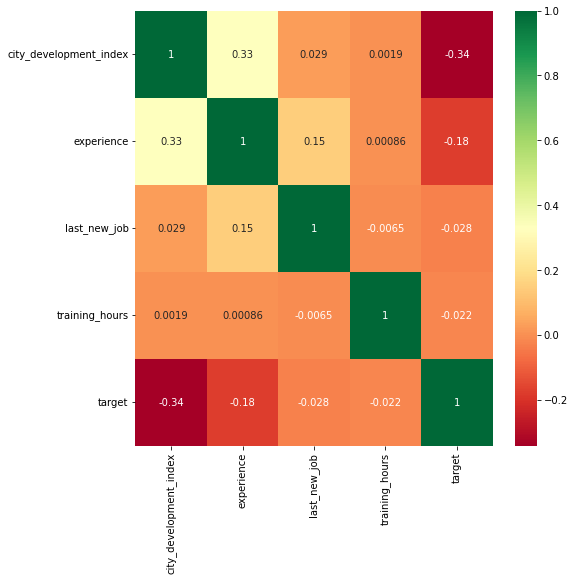

In [24]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [25]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Early Stage Startup,1,36,1
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,4,47,0
2,city_21,0.624,Female,No relevent experience,Full time course,Graduate,STEM,5,Early Stage Startup,5,83,0
3,city_115,0.789,Female,No relevent experience,Part time course,Graduate,Business Degree,1,Pvt Ltd,5,52,1
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,Funded Startup,4,8,0


In [26]:
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(['int64','float'])

In [27]:
df_cat.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,Early Stage Startup
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,Pvt Ltd
2,city_21,Female,No relevent experience,Full time course,Graduate,STEM,Early Stage Startup
3,city_115,Female,No relevent experience,Part time course,Graduate,Business Degree,Pvt Ltd
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,Funded Startup


In [28]:
df_cat.drop(['city'],axis=1,inplace=True)
df_num.drop(['city_development_index'],axis=1,inplace=True)

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [31]:
df_cat

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type
0,1,0,2,0,5,0
1,1,1,2,0,5,5
2,0,1,0,0,5,0
3,0,1,1,0,1,5
4,1,0,2,2,5,1
...,...,...,...,...,...,...
19153,1,1,2,0,2,0
19154,1,0,2,0,5,0
19155,1,0,2,0,5,5
19156,1,0,2,1,1,5


In [32]:
df_num

,experience,last_new_job,training_hours,target
0,20,1,36,1
1,15,4,47,0
2,5,5,83,0
3,1,5,52,1
4,20,4,8,0
...,...,...,...,...
19153,14,1,42,1
19154,14,4,52,1
19155,20,4,44,0
19156,1,2,97,0


In [33]:
df1=pd.concat([df_cat,df_num],axis=1)

In [34]:
df1

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type,experience,last_new_job,training_hours,target
0,1,0,2,0,5,0,20,1,36,1
1,1,1,2,0,5,5,15,4,47,0
2,0,1,0,0,5,0,5,5,83,0
3,0,1,1,0,1,5,1,5,52,1
4,1,0,2,2,5,1,20,4,8,0
...,...,...,...,...,...,...,...,...,...,...
19153,1,1,2,0,2,0,14,1,42,1
19154,1,0,2,0,5,0,14,4,52,1
19155,1,0,2,0,5,5,20,4,44,0
19156,1,0,2,1,1,5,1,2,97,0


In [35]:
x = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

In [36]:
x

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type,experience,last_new_job,training_hours
0,1,0,2,0,5,0,20,1,36
1,1,1,2,0,5,5,15,4,47
2,0,1,0,0,5,0,5,5,83
3,0,1,1,0,1,5,1,5,52
4,1,0,2,2,5,1,20,4,8
...,...,...,...,...,...,...,...,...,...
19153,1,1,2,0,2,0,14,1,42
19154,1,0,2,0,5,0,14,4,52
19155,1,0,2,0,5,5,20,4,44
19156,1,0,2,1,1,5,1,2,97


In [37]:
y

0        1
1        0
2        0
3        1
4        0
        ..
19153    1
19154    1
19155    0
19156    0
19157    0
Name: target, Length: 19158, dtype: int64

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.5, random_state=1)

In [39]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(accuracy_score(ytest, ypred)*100)
    print(classification_report(ytest, ypred))

In [40]:
logreg = LogisticRegression()

In [41]:
mymodel(logreg)

76.20837248146988
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      7223
           1       0.57      0.14      0.22      2356

    accuracy                           0.76      9579
   macro avg       0.67      0.55      0.54      9579
weighted avg       0.72      0.76      0.70      9579



In [42]:
rf = RandomForestClassifier(max_samples=100, random_state=5)
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)

In [43]:
print(accuracy_score(ytest, ypred)*100)
print(classification_report(ytest, ypred))

76.27100949994781
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      7223
           1       0.60      0.11      0.19      2356

    accuracy                           0.76      9579
   macro avg       0.68      0.54      0.52      9579
weighted avg       0.73      0.76      0.69      9579



In [44]:
gdc=GradientBoostingClassifier(n_estimators=100)

In [45]:
mymodel(gdc)

76.18749347531057
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      7223
           1       0.55      0.16      0.25      2356

    accuracy                           0.76      9579
   macro avg       0.67      0.56      0.56      9579
weighted avg       0.72      0.76      0.71      9579



# Hyperparameter Tunning

In [46]:
logreg = LogisticRegression(solver="liblinear")
mymodel(logreg)

76.29188850610711
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      7223
           1       0.58      0.13      0.21      2356

    accuracy                           0.76      9579
   macro avg       0.68      0.55      0.54      9579
weighted avg       0.73      0.76      0.70      9579



In [47]:
cvs = cross_val_score(logreg, x,y, cv=15, scoring="accuracy")
print(f"Avg. Accuracy-: {cvs.mean()*100}\nSTD -: {cvs.std()}")

Avg. Accuracy-: 75.75939876038036
STD -: 0.006066141243032777


In [48]:
cvs = cross_val_score(rf, x,y, cv=15, scoring="accuracy")
print(f"Avg. Accuracy-: {cvs.mean()*100}\nSTD -: {cvs.std()}")

Avg. Accuracy-: 75.58713632180273
STD -: 0.004777136141474523


In [49]:
cvs = cross_val_score(gdc, x,y, cv=15, scoring="accuracy")
print(f"Avg. Accuracy-: {cvs.mean()*100}\nSTD -: {cvs.std()}")

Avg. Accuracy-: 76.00469197621415
STD -: 0.0059230277032515976


In [50]:
prediction = rf.predict(x)

In [51]:
import pickle
with open('model.pkl','wb') as file:
     pickle.dump(rf,file)

In [52]:
with open('model.pkl','rb') as file:
    data=pickle.load(file)

# Result

The maximum accuracy got as 76.29 % by using Logistic Regression.

# Conclusion

1. from above graphs we conclude that employees having 1 or 2 years experience leave therir job. 
2. employees working in public sector and NGO they may not be leave their job while employees working in Early Stage Startup   may be  leave their job .
